### Step 1 : Reading and Understanding the Data
 - Reading the data and checking various data properties
 - Visualizing the data

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [160]:
# Reading the Data
bikesharing = pd.read_csv('day.csv')
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [161]:
bikesharing.shape

(730, 16)

In [162]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [163]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


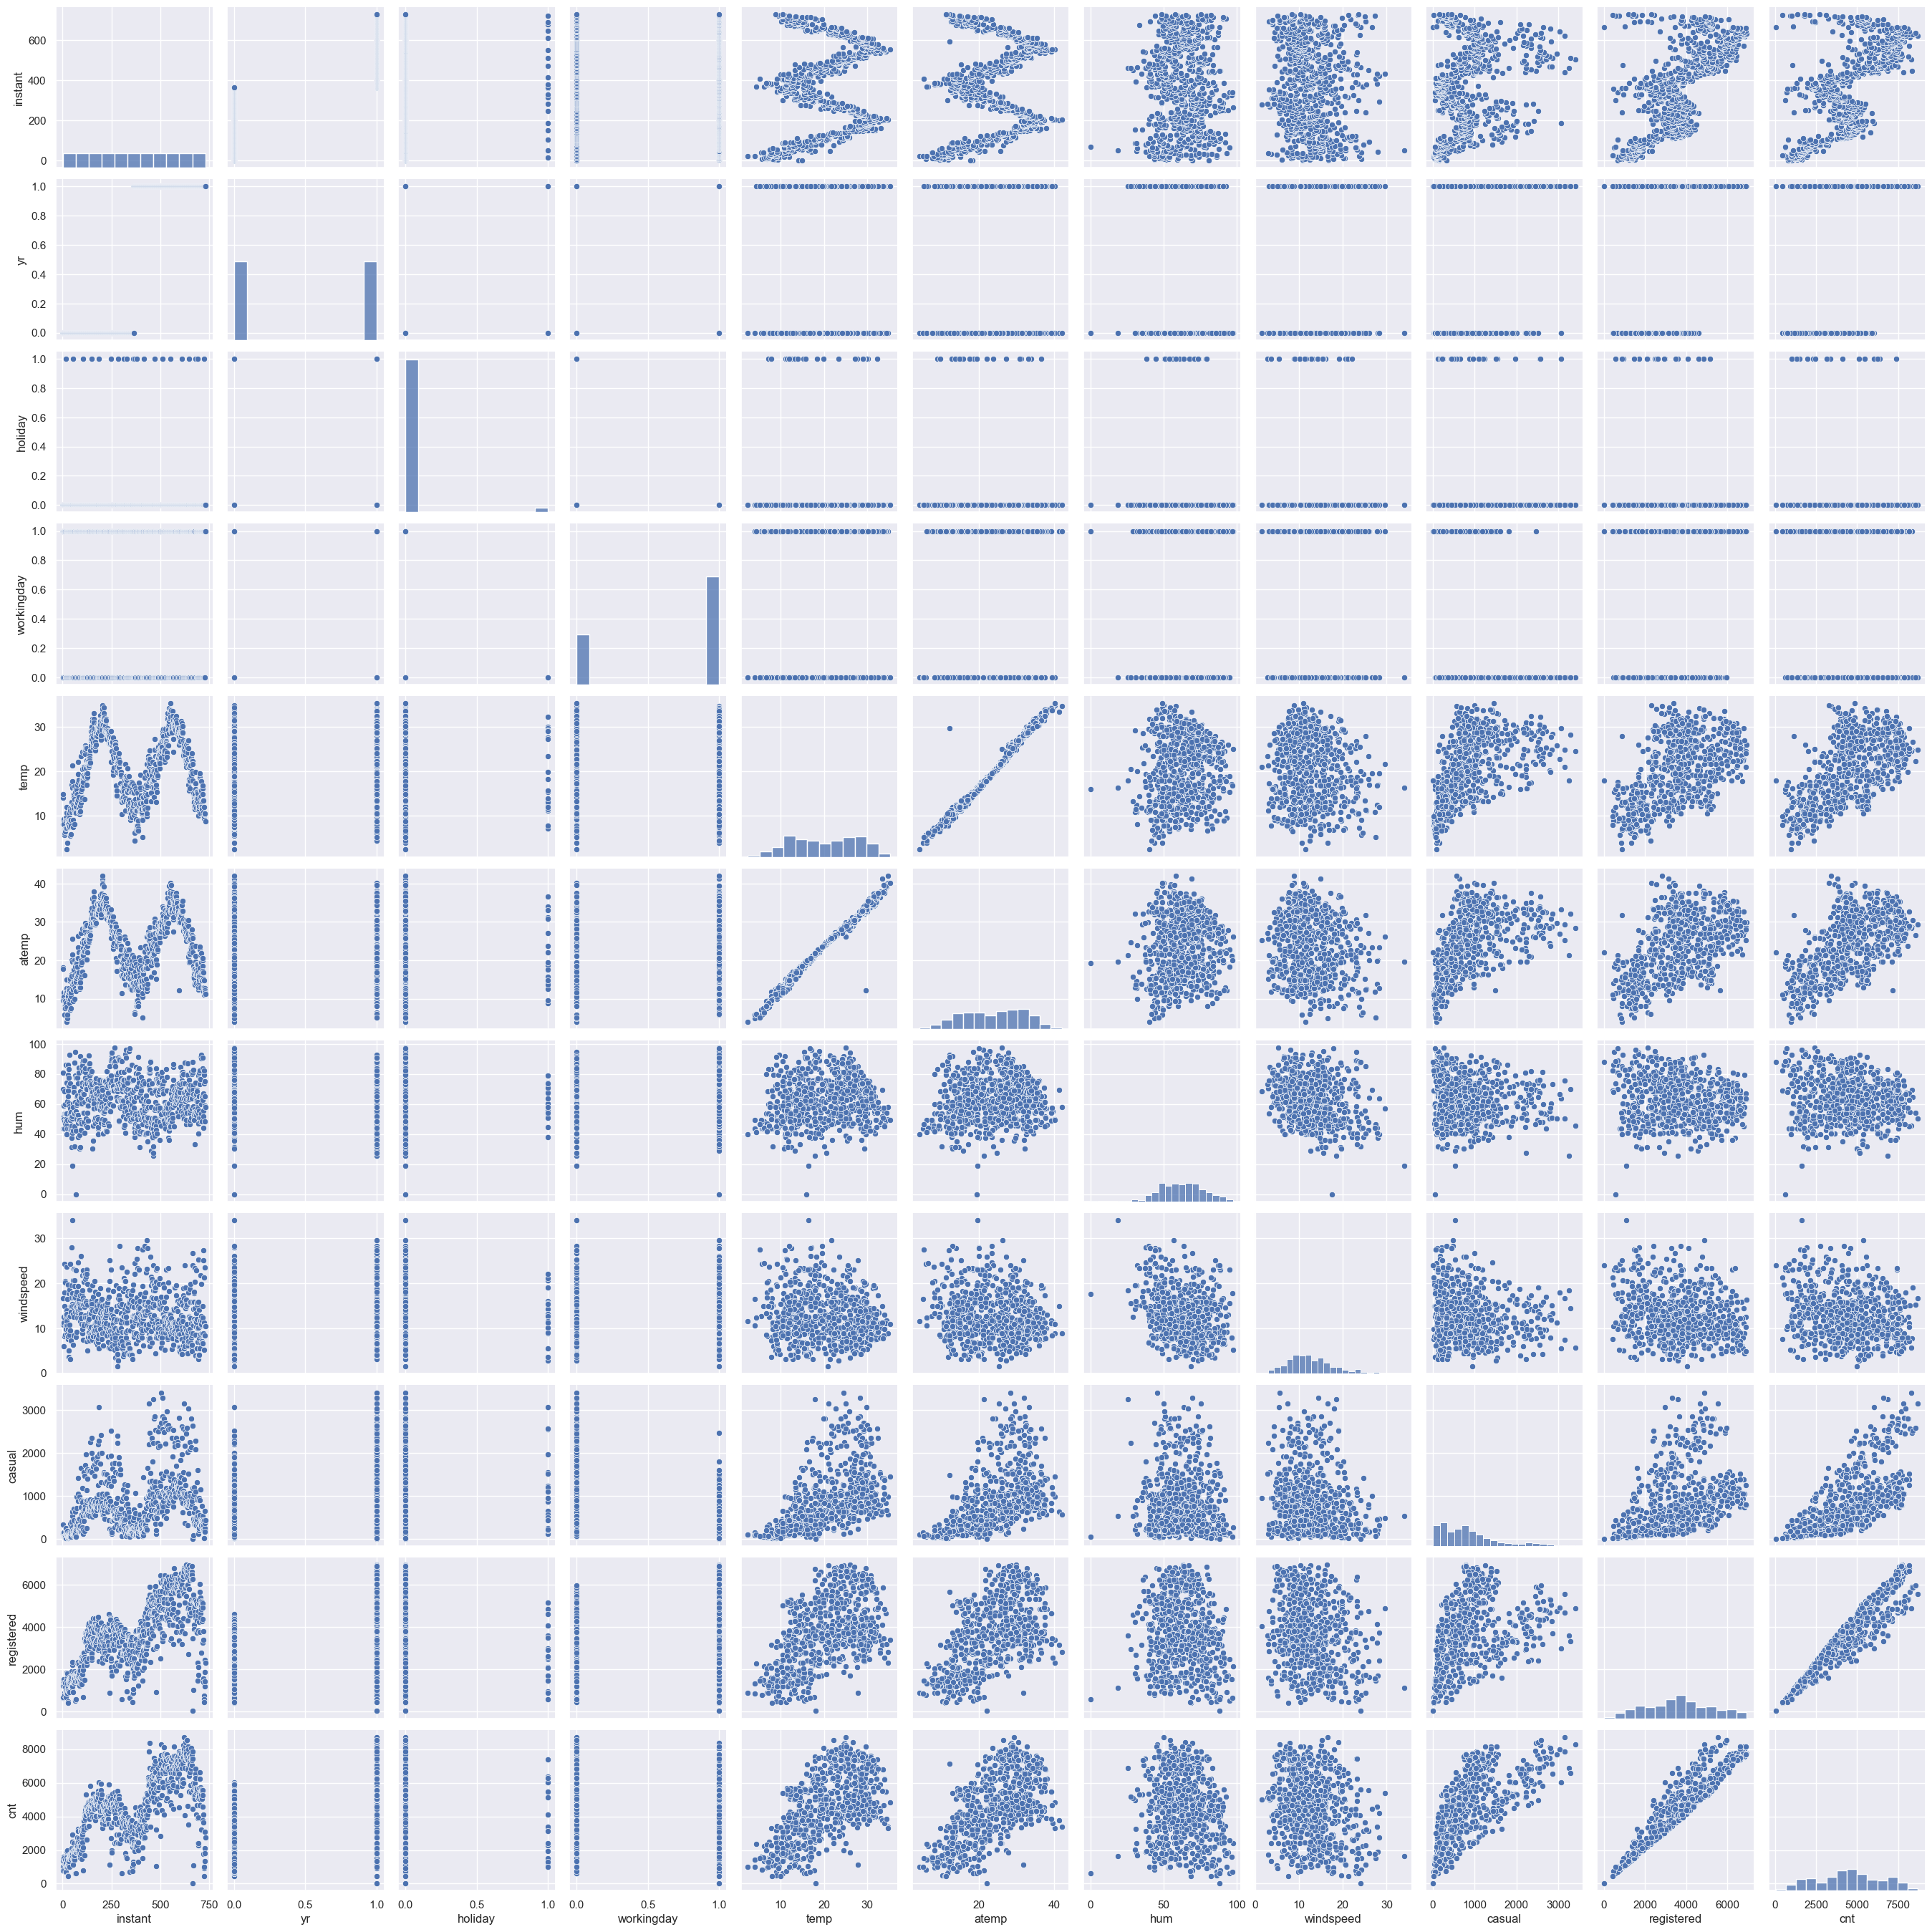

In [164]:
# Visualizing the Data
# Numerical Variables
sns.set(rc={'figure.figsize':(50,38)})
sns.pairplot(bikesharing.loc[:, ~bikesharing.columns.isin(['season', 'mnth', 'weekday', 'weathersit'])])
plt.show()

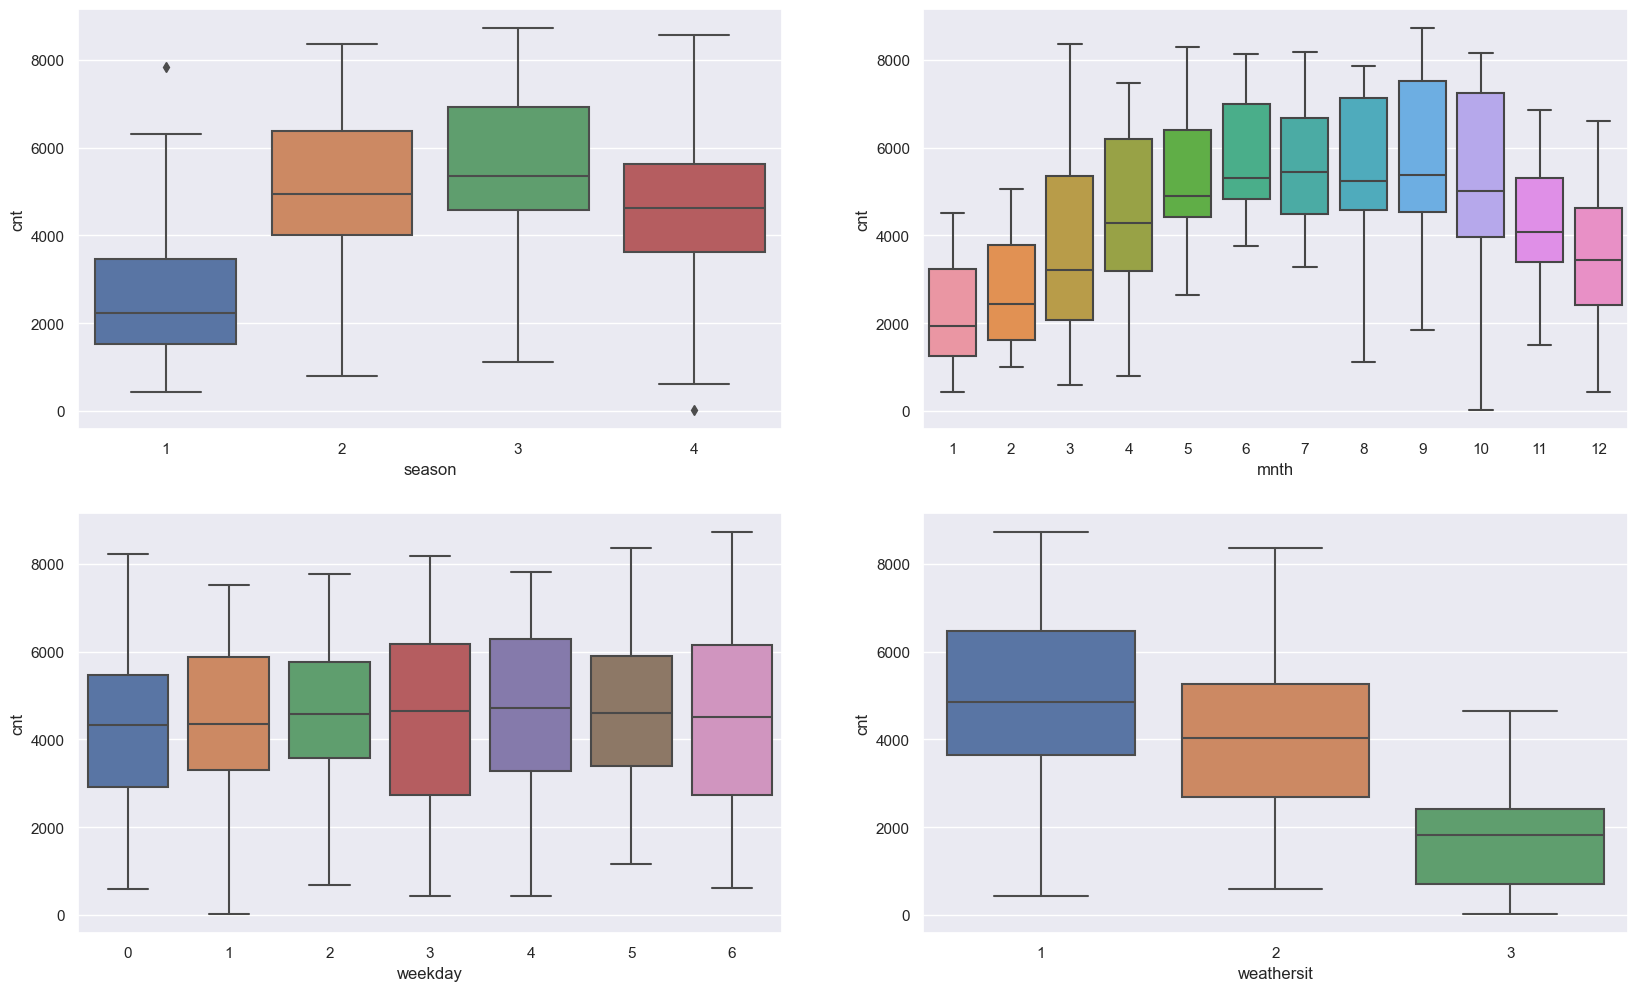

In [165]:
# Categorical Variables
plt.figure(figsize=(20,12))

plt.subplot(2, 2, 1)
sns.boxplot(x='season',y='cnt',data=bikesharing)

plt.subplot(2, 2, 2)
sns.boxplot(x='mnth',y='cnt',data=bikesharing)

plt.subplot(2, 2, 3)
sns.boxplot(x='weekday',y='cnt',data=bikesharing)

plt.subplot(2, 2, 4)
sns.boxplot(x='weathersit',y='cnt',data=bikesharing)

plt.show()

### Step 2 : Preparing the Data for Modelling
 - Encoding:
   - Categorical Variables to Dummy Variables
 - Split data into Train/Test
 - Rescaling

In [166]:
# There are 4 Categorical variables identified
# 1. season
# 2. mnth
# 3. weekday
# 4. weathersit

#### Season

In [167]:
# Check old data
print(bikesharing['season'].value_counts())

# Impute values

# Convert to string
bikesharing['season'] = bikesharing['season'].astype(str)

# Apply corresponding values
bikesharing['season'] = bikesharing[['season']].apply(lambda x:x.map(
    {
        '1' : 'spring', 
        '2' : 'summer',
        '3' : 'fall',
        '4' : 'winter'
    }
))

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64


In [168]:
# Get dummies
season = pd.get_dummies(bikesharing['season'], drop_first = True)

# Concatenate with main dataframe
bikesharing = pd.concat([bikesharing, season], axis = 1)

# Check data
print(bikesharing['season'].value_counts())

# Drop original column
bikesharing = bikesharing.drop('season', axis = 1)

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64


#### Month

In [169]:
# Check old data
print(bikesharing['mnth'].value_counts())

# Impute values

# Convert to string
bikesharing['mnth'] = bikesharing['mnth'].astype(str)

# Apply corresponding values
bikesharing['mnth'] = bikesharing[['mnth']].apply(lambda x:x.map(
    {
        '1' : 'jan', 
        '2' : 'feb',
        '3' : 'mar',
        '4' : 'apr',
        '5' : 'may',
        '6' : 'jun',
        '7' : 'jul',
        '8' : 'aug',
        '9' : 'sep',
        '10' : 'oct',
        '11' : 'nov',
        '12' : 'dec',
        
    }
))

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64


In [170]:
# Get dummies
mnth = pd.get_dummies(bikesharing['mnth'], drop_first = True)

# Concatenate with main dataframe
bikesharing = pd.concat([bikesharing, mnth], axis = 1)

# Check data
print(bikesharing['mnth'].value_counts())

# Drop original column
bikesharing = bikesharing.drop('mnth', axis = 1)

mnth
jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: count, dtype: int64


#### Weekday

In [171]:
# Check old data
print(bikesharing['weekday'].value_counts())

# Impute values

# Convert to string
bikesharing['weekday'] = bikesharing['weekday'].astype(str)

# Apply corresponding values
bikesharing['weekday'] = bikesharing[['weekday']].apply(lambda x:x.map(
    {
        '0' : 'tue', 
        '1' : 'wed',
        '2' : 'thu',
        '3' : 'fri',
        '4' : 'sat',
        '5' : 'sun',
        '6' : 'mon'
    }
))

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64


In [172]:
# Get dummies
weekday = pd.get_dummies(bikesharing['weekday'], drop_first = True)

# Concatenate with main dataframe
bikesharing = pd.concat([bikesharing, weekday], axis = 1)

# Check data
print(bikesharing['weekday'].value_counts())

# Drop original column
bikesharing = bikesharing.drop('weekday', axis = 1)

weekday
mon    105
tue    105
wed    105
thu    104
sat    104
sun    104
fri    103
Name: count, dtype: int64


#### Weathersit

In [173]:
# Check old data
bikesharing['weathersit'].value_counts()

# Impute values

# Convert to string
bikesharing['weathersit'] = bikesharing['weathersit'].astype(str)

# Apply corresponding values
bikesharing['weathersit'] = bikesharing[['weathersit']].apply(lambda x:x.map(
    {
        '1' : 'A', 
        '2' : 'B',
        '3' : 'C',
        '4' : 'D'
    }
))

In [174]:
# Get dummies
weathersit = pd.get_dummies(bikesharing['weathersit'], drop_first = True)

# Concatenate with main dataframe
bikesharing = pd.concat([bikesharing, weathersit], axis = 1)

# Check data
print(bikesharing['weathersit'].value_counts())

# Drop original column
bikesharing = bikesharing.drop('weathersit', axis = 1)

weathersit
A    463
B    246
C     21
Name: count, dtype: int64


In [175]:
# Drop unwanted columns

# Drop instant, since it is a unique identifier and not useful
bikesharing = bikesharing.drop('instant', axis = 1)

# Drop dteday, since we already derived other columns like season and year from it
bikesharing = bikesharing.drop('dteday', axis = 1)

# Drop columns casual and registered, since we dont need bifurcation of cnt for this analysis
bikesharing = bikesharing.drop(['casual', 'registered'], axis = 1)

# Drop temp, since temp and atemp have very high correlation. Keeping atemp since it is adjusted
bikesharing = bikesharing.drop('temp', axis = 1)


# Check data
bikesharing.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,B,C
0,0,0,0,18.18125,80.5833,10.749882,985,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,0,0,0,17.68695,69.6087,16.652113,801,True,False,False,...,False,False,False,False,False,False,True,False,True,False
2,0,0,1,9.47025,43.7273,16.636703,1349,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,10.60610,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,0,1,11.46350,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [176]:
bikesharing.shape

(730, 29)

#### Split data into train and test

In [177]:
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


#### Rescaling - MinMax

In [178]:
# Steps MinMax Scale

# 1. Instantiate an object
scaler = MinMaxScaler()

# 2. Create a list of numerics variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# 3. Fit the Data
# Either use below 2 methods
#    a. fit() : learns xmin,xmax
#    b. transform() : perform x-xmin/xmax-xmin
# Or use below one method
#    fit_transform()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,B,C
576,1,0,1,0.766351,0.725633,0.264686,0.827658,False,False,False,...,False,False,False,False,False,True,False,False,False,False
426,1,0,0,0.438975,0.640189,0.255342,0.465255,True,False,False,...,False,False,True,False,False,False,False,False,True,False
728,1,0,0,0.200348,0.498067,0.663106,0.204096,True,False,False,...,False,False,False,False,False,False,True,False,False,False
482,1,0,0,0.391735,0.504508,0.188475,0.482973,False,True,False,...,False,False,True,False,False,False,False,False,True,False
111,0,0,1,0.318819,0.751824,0.380981,0.191095,False,True,False,...,False,False,False,False,True,False,False,False,True,False


### Step 3 : Training the Model

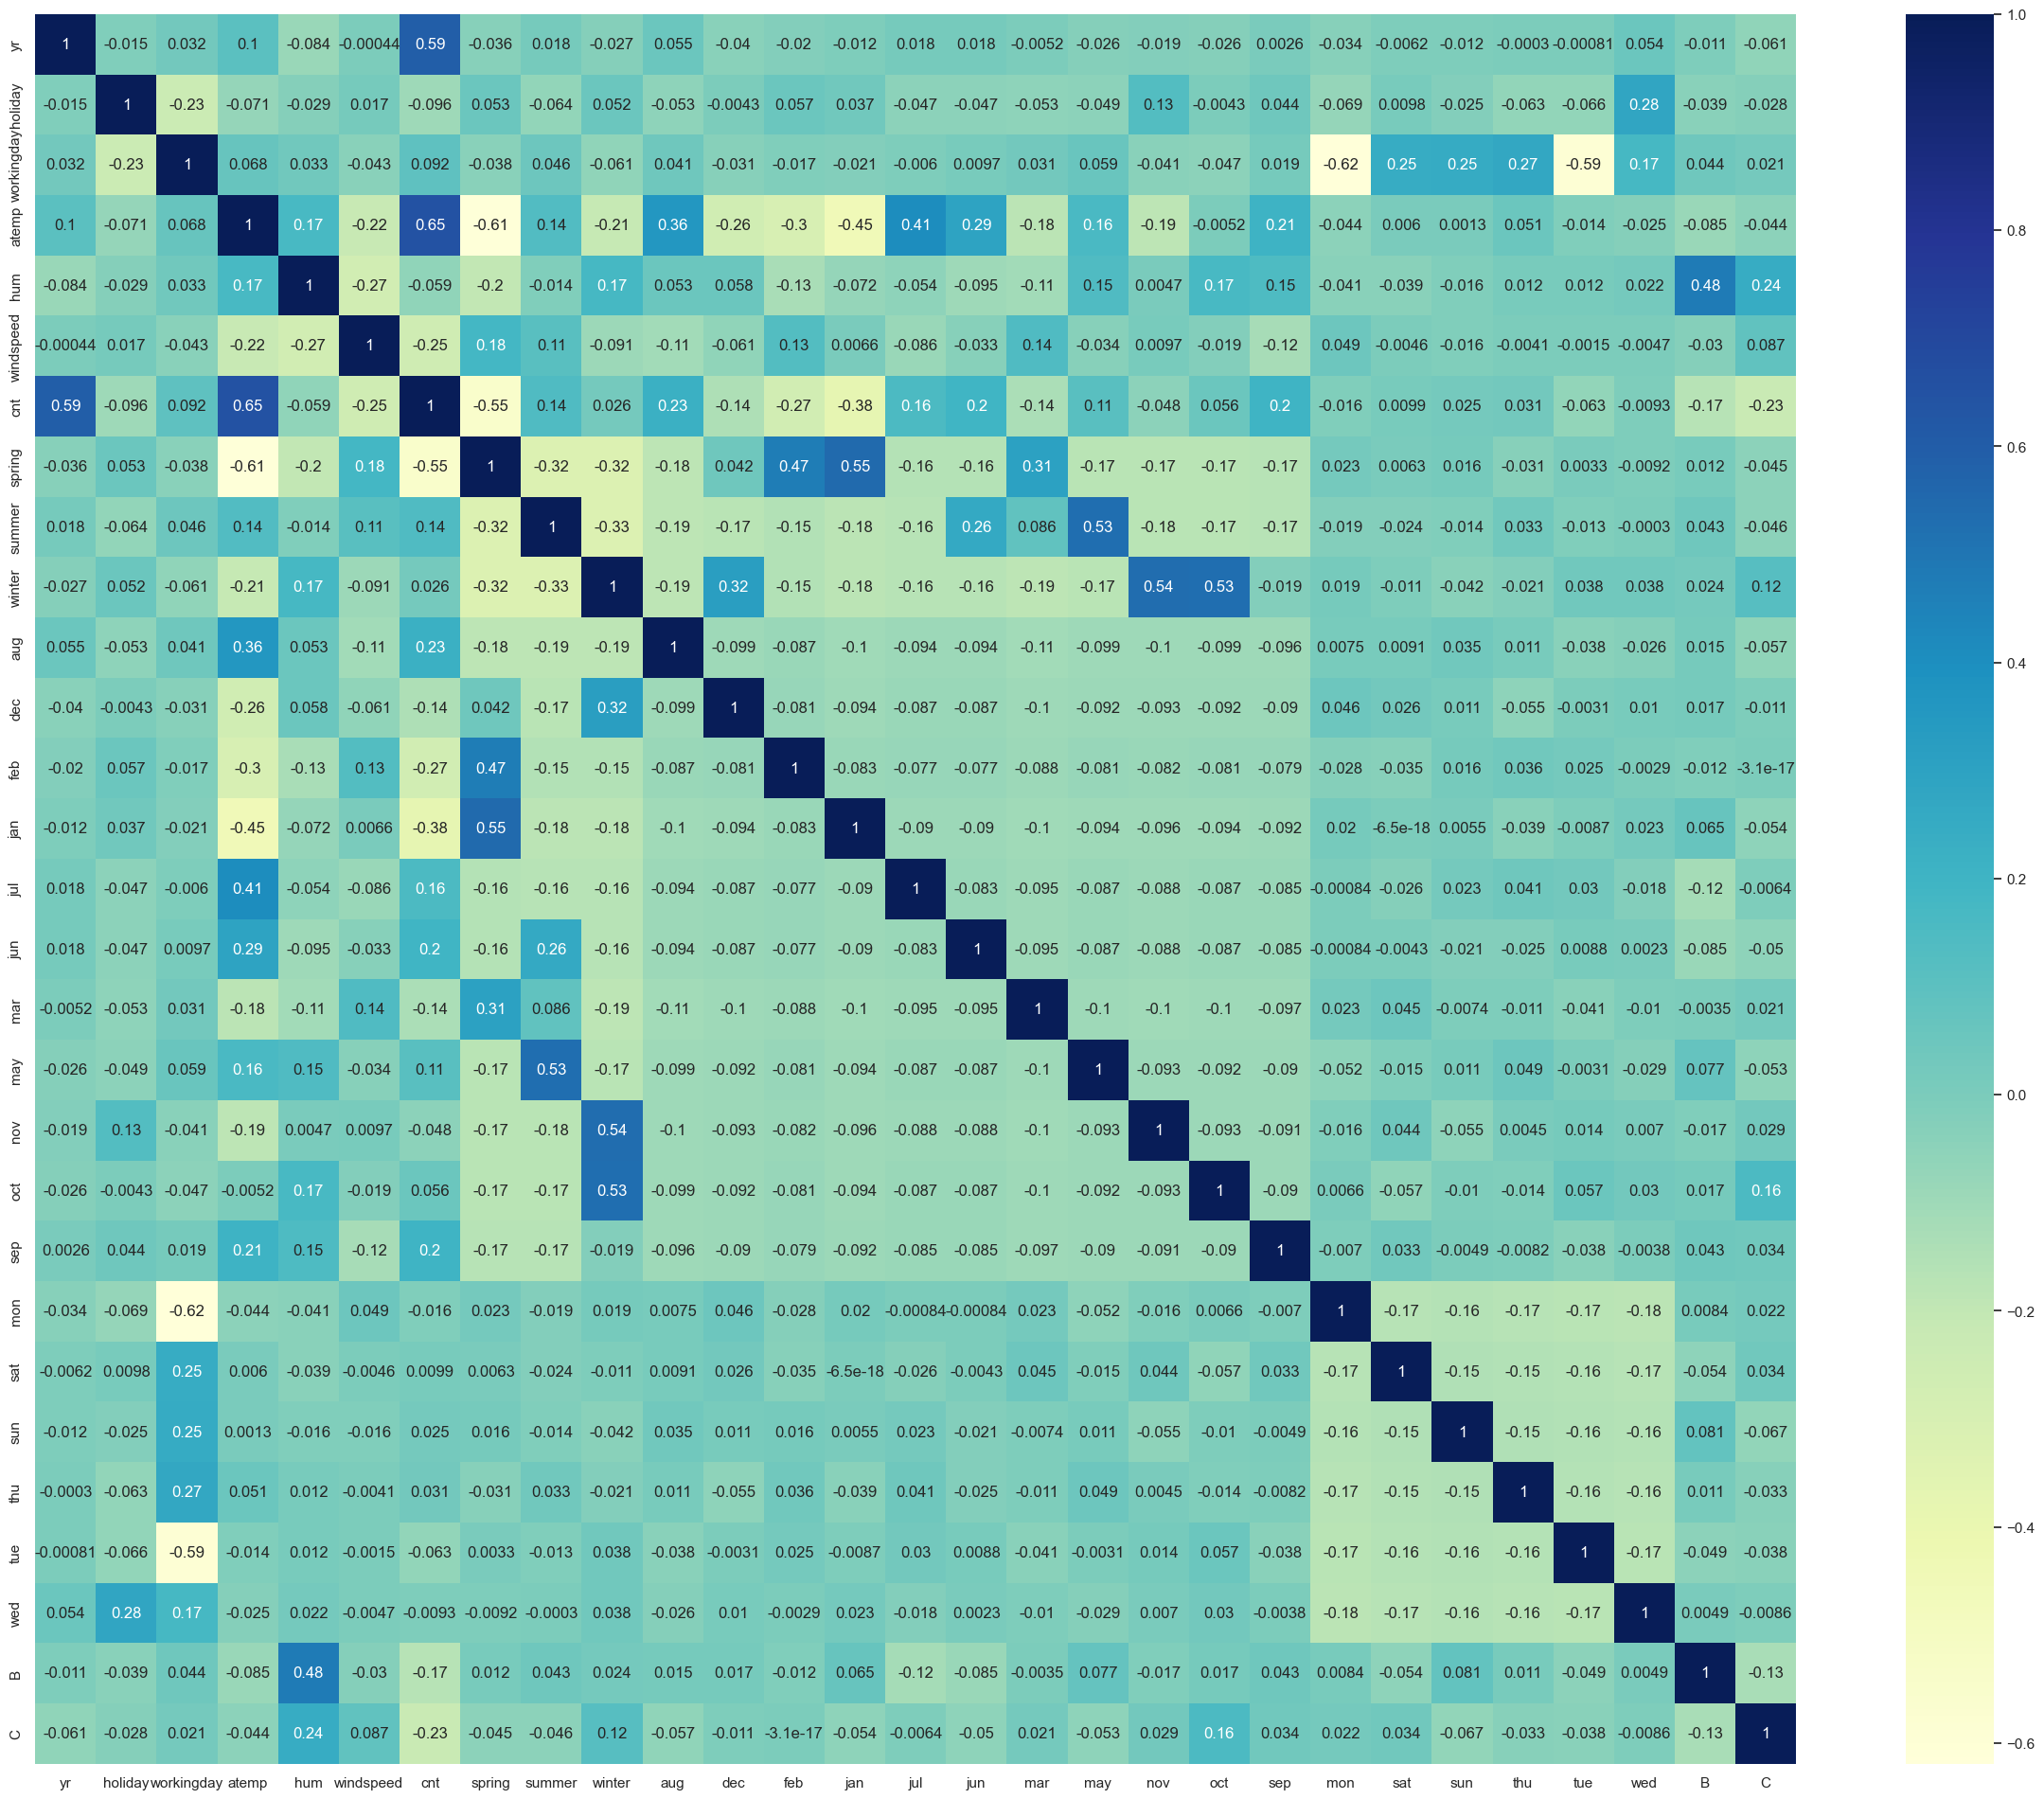

In [179]:
# heatmap
plt.figure(figsize = (30, 24))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [180]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

#### RFE

In [181]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [182]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10) # Running RFE
rfe = rfe.fit(X_train, y_train)

In [183]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 10),
 ('summer', False, 3),
 ('winter', True, 1),
 ('aug', False, 4),
 ('dec', False, 8),
 ('feb', False, 7),
 ('jan', False, 6),
 ('jul', False, 13),
 ('jun', False, 12),
 ('mar', False, 18),
 ('may', False, 11),
 ('nov', False, 9),
 ('oct', False, 19),
 ('sep', False, 2),
 ('mon', True, 1),
 ('sat', False, 17),
 ('sun', False, 16),
 ('thu', False, 15),
 ('tue', True, 1),
 ('wed', False, 14),
 ('B', False, 5),
 ('C', True, 1)]

In [184]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'winter',
       'mon', 'tue', 'C'],
      dtype='object')

In [185]:
X_train.columns[~rfe.support_]

Index(['spring', 'summer', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'sat', 'sun', 'thu', 'wed', 'B'],
      dtype='object')

In [186]:
X_train['winter'] = X_train['winter'].apply(lambda x: 1 if x else 0)

In [187]:
X_train['mon'] = X_train['mon'].apply(lambda x: 1 if x else 0)

In [188]:
X_train['tue'] = X_train['tue'].apply(lambda x: 1 if x else 0)

In [189]:
X_train['C'] = X_train['C'].apply(lambda x: 1 if x else 0)

#### Building Model using statsmodel for detailed statistics

In [190]:
X_train_lm = X_train[col]
X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     219.1
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.95e-167
Time:                        20:27:05   Log-Likelihood:                 446.46
No. Observations:                 510   AIC:                            -872.9
Df Residuals:                     500   BIC:                            -830.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1788      0.023      7.659      0.0

In [191]:
# Since holiday has a high p-value 0.506 > 0.05, we can drop this variable
X_train_lm = X_train_lm.drop(['holiday'], axis = 1)

In [192]:
# Rebuild the Model
X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     219.1
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.95e-167
Time:                        20:27:05   Log-Likelihood:                 446.46
No. Observations:                 510   AIC:                            -872.9
Df Residuals:                     500   BIC:                            -830.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1632      0.039      4.145      0.0

In [193]:
# Since tuesday has a high p-value 0.112 > 0.05, we can drop this variable
X_train_lm = X_train_lm.drop(['tue'], axis = 1)

In [194]:
# Rebuild the Model
X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     245.5
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          6.44e-168
Time:                        20:27:05   Log-Likelihood:                 445.17
No. Observations:                 510   AIC:                            -872.3
Df Residuals:                     501   BIC:                            -834.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2032      0.030      6.701      0.0

In [195]:
# Checking VIF 
X_train_lm = X_train_lm.drop(['const'], axis = 1)

In [196]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,11.70
2,atemp,7.19
1,workingday,4.53
4,windspeed,3.60
0,yr,2.02
6,mon,1.79
5,winter,1.47
7,C,1.09


In [197]:
# Since humidity has a high VIF 11.70 > 10, we can drop this variable
X_train_lm = X_train_lm.drop(['hum'], axis = 1)

In [198]:
# Rebuild the Model
X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     249.6
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          5.46e-159
Time:                        20:27:05   Log-Likelihood:                 421.31
No. Observations:                 510   AIC:                            -826.6
Df Residuals:                     502   BIC:                            -792.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0460      0.021      2.154      0.0

In [199]:
# Checking VIF again
X_train_lm = X_train_lm.drop(['const'], axis = 1)

In [200]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,atemp,4.30
1,workingday,3.92
3,windspeed,3.26
0,yr,2.02
5,mon,1.66
4,winter,1.27
6,C,1.06


#### Conclusion : Since All p-values are less than 0.05 and VIF less than 5, we can conclude that this is a reliable model

In [201]:
# Rebuild the Model for further step
X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm).fit()

### Step 4 : Residual Analysis

In [202]:
y_train_cnt = lm.predict(X_train_lm)

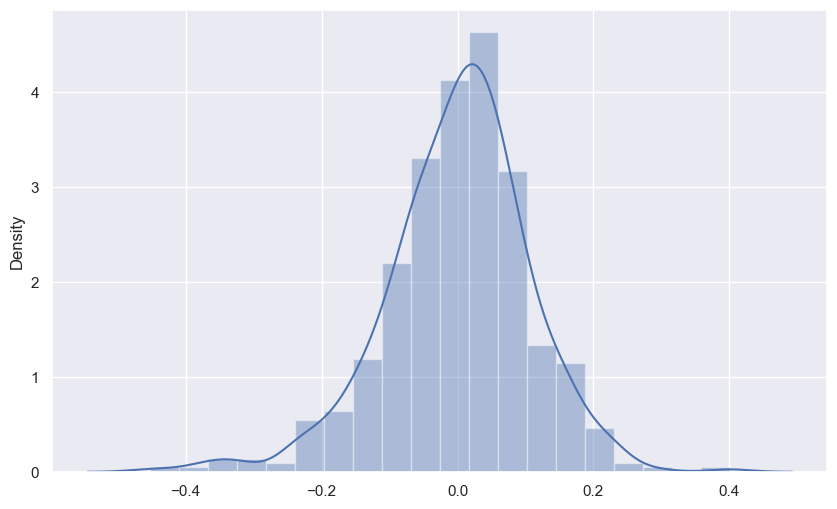

In [203]:
plt.figure(figsize=(10, 6))
sns.distplot((y_train-y_train_cnt), bins = 20)
plt.show()

### Step 5 : Prediction and Evaluation on the Test set

#### Apply scaling on test sets

In [204]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,B,C
184,0,1,0,0.769660,0.657364,0.084219,0.692706,False,False,False,...,False,False,False,False,False,False,False,True,True,False
535,1,0,1,0.842587,0.610133,0.153728,0.712034,False,True,False,...,False,False,False,False,False,False,False,False,False,False
299,0,0,1,0.496145,0.837699,0.334206,0.303382,False,False,True,...,True,False,False,True,False,False,False,False,True,False
221,0,0,1,0.795343,0.437098,0.339570,0.547400,False,False,False,...,False,False,False,False,False,False,False,False,False,False
152,0,0,1,0.741471,0.314298,0.537414,0.569029,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [205]:
y_test = df_test.pop('cnt')
X_test = df_test

In [206]:
# Get columns from Training set
X_train_lm.columns

Index(['const', 'yr', 'workingday', 'atemp', 'windspeed', 'winter', 'mon',
       'C'],
      dtype='object')

In [207]:
X_test_lm = X_test[['yr', 'workingday', 'atemp', 'windspeed', 'winter', 'mon', 'C']]

X_test_lm = sm.add_constant(X_test_lm)

In [208]:
y_pred = lm.predict(X_test_lm)

In [209]:
y_pred

184    0.525258
535    0.848669
299    0.469182
221    0.562309
152     0.50435
         ...   
702    0.719344
127     0.40478
640    0.855613
72      0.28406
653     0.71041
Length: 220, dtype: object

In [210]:
r2_score(y_test, y_pred)

0.7509337439844859